# Exercise 1.1

We wish to compute
$$k_{r,s}^{(i)} = \int_{x_i}^{x_{i+1}}\left((N_r^{(i)})'(N_s^{(i)})'+N_r^{(i)}N_s^{(i)}\right)dx$$

We have
$$ k_{1,1} = \int_{x_i}^{x_{i+1}} \frac{1}{h_i^2} + \left(1 - \frac{x-x_i}{h_i}\right)^2\,dx $$
and by substitution $y=\frac{x-x_{i}}{h_i}$ where $dx = h_i dy$ we obtain

$$ k_{1,1} = \int_{0}^{1} \frac{1}{h_i} + h_i\left(1 - y\right)^2\,dy $$

and using $\left(-\frac{1}{3}(1-y)^3\right)' = (1-y)^2$ we obtain

$$ k_{1,1} = \left[ \frac{y}{h_i} \right]_{0}^{1} + \left[ -\frac{h_i}{3}(1-y)^3 \right]_{0}^{1} = \frac{1}{h_i} + \frac{h_i}{3}$$


Next
$$ k_{2,2} = \int_{x_i}^{x_{i+1}} \frac{1}{h_i^2} + \left(\frac{x-x_i}{h_i}\right)^2\,dx $$
and substituting $y=\frac{x-x_{i}}{h_i}$ again we obtain

$$ k_{2,2} = \int_{0}^{1} \frac{1}{h_i} + h_i y^2\,dy $$

and thus

$$ k_{2,2} = \left[ \frac{y}{h_i} \right]_{0}^{1} + \left[\frac{h_i}{3}y^3 \right]_{0}^{1} = \frac{1}{h_i} + \frac{h_i}{3}$$


And finally
$$ k_{1,2} = \int_{x_i}^{x_{i+1}} -\frac{1}{h_i^2} + \left(1-\frac{x-x_i}{h_i}\right)\left(\frac{x-x_i}{h_i}\right)\,dx $$

so substitution and previously we have

$$ k_{1,2} = \int_{0}^{1} -\frac{1}{h_i} + h_i\left(y-y^2\right)\,dy $$

and thus

$$ k_{1,2} = \left[ -\frac{y}{h_i} \right]_{0}^{1} + h_i\left[\frac{1}{2}y^2 - \frac{1}{3}y^3 \right]_{0}^{1} = -\frac{1}{h_i} + \frac{h_i}{6}$$


b) 

It follows by equation 1.21 in the notes that
\begin{align*}
\hat{u}_1 &= c = 1 \\
\hat{u}_3 &= d = e^2
\end{align*}
and from equation 1.22 we get
\begin{align*}
\hat{u}_2 = \frac{-(a_{2,1}\hat{u}_1 + a_{2,3} \hat{u}_3)}{a_{2,2}}
\end{align*}
We find a coefficients by equation 1.28
\begin{align*}
a_{2,1} &= k_{2,1}^{(1)} = \frac{-1}{h_1} + \frac{h_1}{6}\\[10pt]
a_{2,3} &= k_{1,2}^{(2)} = \frac{-1}{h_2} + \frac{h_2}{6}\\[10pt]
a_{2,2} &= k_{2,2}^{(1)} + k_{1,1}^{(2)} = \frac{1}{h_1} + \frac{h_1}{3} + \frac{1}{h_2} + \frac{h_2}{3} = \frac{1}{h_1} + \frac{1}{h_2} + \frac{h_1 + h_2}{3}
\end{align*}
In the non-uniform case we have $h_1=\frac{4}{3}$ and $h_2=\frac{2}{3}$ and we get
\begin{align*}
\hat{u}_2 = - \frac{ \left(\frac{-1}{h_1} + \frac{h_1}{6} \right) + \left( \frac{-1}{h_2} + \frac{h_2}{6} \right) e^2 }{\frac{1}{h_1} + \frac{1}{h_2} + \frac{h_1 + h_2}{3}} \approx 3.70
\end{align*}
in the uniform case $h_1=h_2=h=1$ this reduces to
\begin{align*}
\hat{u}_2 = - \left(\frac{-1}{h} + \frac{h}{6} \right) \frac{1+e^2}{ \frac{2}{h} + \frac{2h}{3} } \approx 2.62
\end{align*}

c) and d)

In [52]:
import numpy as np
from matplotlib import pyplot as plt

$c_1 = 1, c_2 = 0$

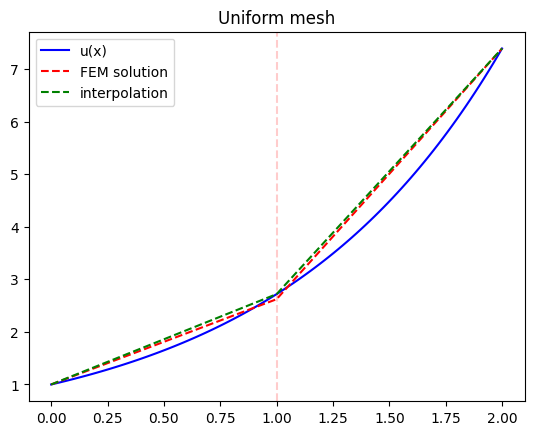

In [51]:
L = 2
c = 1
d = np.exp(2)

K = lambda h: np.array([[1/h + h/3, -1/h + h/6], [-1/h + h/6, 1/h + h/3]])
u = lambda x: np.exp(x)

def uhat(u1,u3,h1,h2):
    K1 = K(h1)
    K2 = K(h2)
    a21 = K1[1,0]
    a23 = K2[0,1]
    a22 = K1[1,1] + K2[0,0]

    return -(a21*u1+a23*u3)/(a22)

# True values
x = np.linspace(0, L, 100)
plt.plot(x, u(x), 'b-',label="u(x)")

# For uniform mesh:
xunif = [0, L/2, L]
yunif = [c, uhat(c,d,L/2,L/2), d]
plt.plot(xunif, yunif, 'r--',label="FEM solution")
plt.axvline(L/2, 0, L,alpha=0.2,color='red',linestyle='--')


# interpolation mesh:
xI = [0, L/2, L]
yI = [c, u(1), d]
plt.plot(xI, yI, 'g--',label="interpolation")

plt.title("Uniform mesh")
plt.legend()
plt.show()

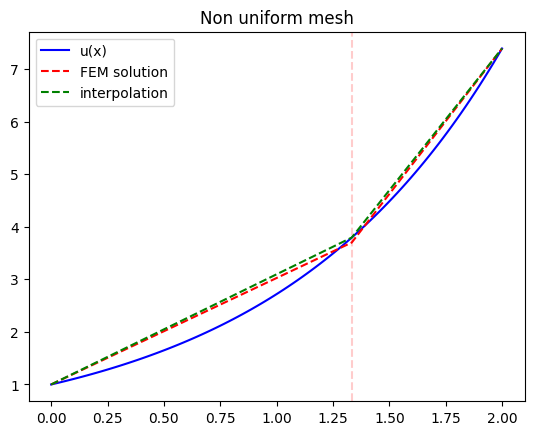

2.6215800309158284


In [33]:
# True values
x = np.linspace(0, L, 100)
plt.plot(x, u(x), 'b-',label="u(x)")

# non uniform mesh:
xnunif = [0, 2*L/3, L]
ynunif = [c, uhat(c,d,2*L/3,L/3), d]
plt.plot(xnunif, ynunif, 'r--',label="FEM solution")

plt.axvline(2*L/3, 0, L,alpha=0.2,color='red',linestyle='--')

# interpolation mesh:
xI = [0, 2*L/3, L]
yI = [c, u(2*L/3), d]
plt.plot(xI, yI, 'g--',label="interpolation")


plt.title("Non uniform mesh")
plt.legend()
plt.show()

e)
Difference: We see that although the interpolation is exact in the nodes, the FEM solution is generally closer to $u(x)$.
The interpolation is defined to be exact in the nodes, the FEM solution is defined to satisfy the weak form of the boundary value problem in the nodes and using the $\textit{energy norm}$ we see that the error from the interpolation is indeed weakly greater than from $\hat{u}(x)$. 

f) We have found there are 5 steps:
>   1. Convert to boundary value problem (strong form) to weak formulation (weak form).
>   2. Discretize the domain and define corresponding basis functions.
>   3. Calculate the element matrix $K_i$
>   4. Setup linear equation system using $K_i$ and impose boundary conditions
>   5. Solve linear equation system.

# Exercise 1.2

a) and b)

In the following we have written a function BVP1D that fulfills the criterias explained in exercise 1.2 a) and b). 

In [53]:
import numpy as np
from scipy.sparse import csr_matrix
K = lambda h: np.array([[1/h + h/3, -1/h + h/6], [-1/h + h/6, 1/h + h/3]])

def GlobalAssembly(x):
    M = len(x)
    nnzmax = 4 * M
    ii = np.ones(nnzmax, dtype=int)
    jj = np.ones(nnzmax, dtype=int)
    ss = np.zeros(nnzmax)
    b = np.zeros(M)
    count = 0
    for i in range(M - 1):
        h = x[i+1] - x[i]
        Ki = K(h)

        ii[count:count + 4] = [i, i, i + 1, i + 1]
        jj[count:count + 4] = [i, i + 1, i + 1, i]
        ss[count:count + 4] = [
        Ki[0, 0],
        Ki[0, 1],
        Ki[1, 1],
        Ki[1, 0]
        ]
        count += 4
    
    A = csr_matrix((ss[:count], (ii[:count], jj[:count])), shape=(M, M))

    # Boundary conditions
    b[0] = c
    b[1] -= A[0,1]*c

    A[0,0] = 1
    A[0,1] = 0
    A[1,0] = 0
    
    b[M-1] = d
    b[M-2] -= A[M-1,M-2]*d

    A[M-1,M-1] = 1
    A[M-1,M-2] = 0
    A[M-2,M-1] = 0

    return A, b

In [54]:
from scipy import sparse
import numpy as np

def BVP1D(L, c, d, x, plot=True):
    
    if type(x) == int:
        x = np.linspace(0, L, x)

    A,b = GlobalAssembly(x)

    u = sparse.linalg.spsolve(A, b)
    
    if plot:
        plt.plot(x, u, 'r--',label="FEM solution")
        plt.show()

    return u


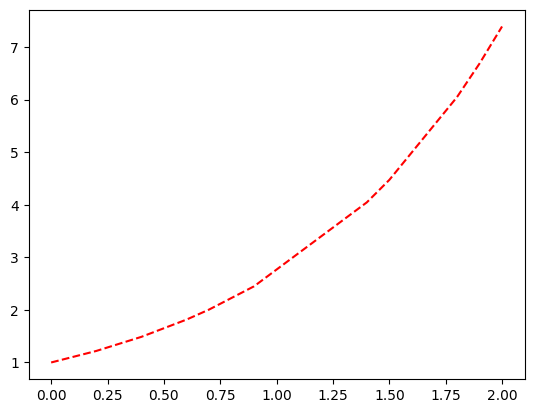

In [65]:
#test case
x = [0.0, 0.2, 0.4, 0.6, 0.7, 0.9, 1.4, 1.5, 1.8, 1.9, 2.0]

L=2 
c=1
d=np.exp(2)

u = BVP1D(L, c, d, x)

c) 
validate with exercise 1.1
Running the program with the mesh structures from we obtain the desired values. 

In [62]:
L=2 
c=1
d=np.exp(2)
x1 = [0, L/2, L]
x2 = [0, 2*L/3, L]

u1 = BVP1D(L, c, d, x1, False)
u2 = BVP1D(L, c, d, x2, False)
print(u1)
print(u2)

[1.         2.62158003 7.3890561 ]
[1.         3.69955052 7.3890561 ]


Exercise 1.2 d

In [66]:
def convergence_test(h):
    x = np.linspace(0, L, h)
    uhat = BVP1D(L, c, d, x, False)
    u = lambda x: np.exp(x)
    return np.linalg.norm(uhat-u(x),np.inf)

In [58]:
H = np.logspace(-1, -2, 10)
error = np.zeros(len(H))
for i,h in enumerate(H):
    error[i] = convergence_test(int(L/h))

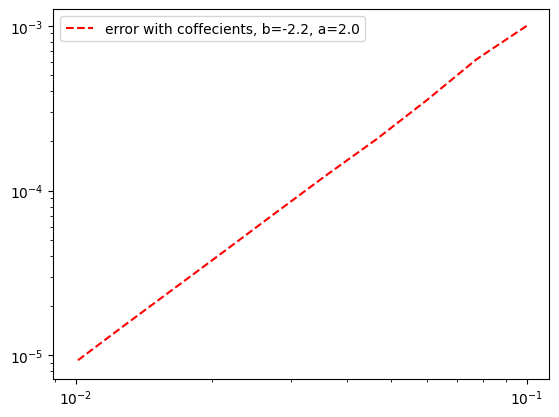

In [59]:
a,b = np.polyfit(np.log(H), np.log(error), 1)

plt.loglog(H, error, 'r--',label=f"error with coffecients, b={np.round(b,1)}, a={np.round(a,1)}")
plt.legend()
plt.show()


# Exercise 1.5

We use integration by parts to find $a(u,v)$ and $l(v)$, note that $\Omega = (0,1)$. By equation 1.35 in the exercise we multiply by $v$ 
\begin{align*}
-(\epsilon u' )' + (\Psi u)' = f
\end{align*}
we multiply by $v$ and integrate
\begin{align*}
\int_\Omega -(\epsilon u' )' v dx + \int_\Omega (\Psi u)' v dx = \int_\Omega f v dx
\end{align*}
By integration by parts we have
\begin{align*}
\int_\Omega \epsilon u' v' dx - \int_\Omega \Psi u v' dx = \int_\Omega f v dx
\end{align*}
Now we see that the left-hand side is $a(u,v)$ and the right-hand side is $l(v)$.


By approximating $u$ with $\hat{u} = \sum_j \hat{u}_j N_j $ and replacing $v$ with $N_i$ we get
\begin{align*}
\int_\Omega \epsilon \left( \sum_j \hat{u}_j N_j' \right) N_i' dx - \int_\Omega \Psi \left( \sum_j \hat{u}_j N_j \right) N_i' dx = \int_\Omega f N_i dx
\end{align*}
which can be rewritten as
\begin{align*}
\sum_j  \left(  \epsilon \int_\Omega  N_j' N_i' dx - \Psi \int_\Omega N_j N_i' dx \right) \hat{u}_j = \int_\Omega f N_i dx
\end{align*}
by defining
\begin{align*}
A_{i,j} &=  \epsilon \int_\Omega  N_j' N_i' dx - \Psi \int_\Omega N_j N_i' dx \\[5pt]
x_j &= \hat{u}_j\\[5pt]
b_i &= \int_\Omega f N_i dx
\end{align*}
We get a linear system $A x = b$.

In the matrix A only elements of the type $A_{i,i-1}$, $A_{i,i}$ and $A_{i,i+1}$ contribute since it is here the hat functions overlap.

\begin{align*}
A_{i,i-1} &= \epsilon \int_0^1 N_i' N_{i-1}' dx - \Psi \int_0^1 N_i' N_{i-1} dx \\[5pt]
          &= \epsilon \int_{x_{i-1}}^{x_i} N_i' N_{i-1}' dx - \Psi \int_{x_{i-1}}^{x_i} N_i' N_{i-1} dx \\[5pt]
          &= \epsilon \int_{x_{i-1}}^{x_i} (N_2^{(i-1)})' (N_1^{(i-1)})' dx - \Psi \int_{x_{i-1}}^{x_i} (N_2^{(i-1)})' N_1^{(i-1)} dx 
\end{align*}

\begin{align*}
A_{i,i} &= \epsilon \int_0^1 N_i' N_i' dx - \Psi \int_0^1 N_i' N_i dx \\[5pt]
        &= \epsilon \int_{x_{i-1}}^{x_i} N_i' N_i' dx - \Psi \int_{x_{i-1}}^{x_i} N_i' N_i dx + \epsilon \int_{x_{i}}^{x_{i+1}} N_i' N_i' dx - \Psi \int_{x_{i}}^{x_{i+1}} N_i' N_i dx \\[5pt]
        &= \epsilon \int_{x_{i-1}}^{x_i} (N_2^{(i-1)})' (N_2^{(i-1)})' dx - \Psi \int_{x_{i-1}}^{x_i} (N_2^{(i-1)})'  N_2^{(i-1)}  dx + \epsilon \int_{x_{i}}^{x_{i+1}} (N_1^{(i)})' (N_1^{(i)})' dx - \Psi \int_{x_{i}}^{x_{i+1}} (N_1^{(i)})' N_1^{(i)} dx
\end{align*}

\begin{align*}
A_{i,i+1} &= \epsilon \int_0^1 N_i' N_{i+1}' dx - \Psi \int_0^1 N_i' N_{i+1} dx \\[5pt]
          &= \epsilon \int_{x_{i}}^{x_{i+1}} N_i' N_{i+1}' dx - \Psi \int_{x_{i}}^{x_{i+1}} N_i' N_{i+1} dx \\[5pt]
          &= \epsilon \int_{x_{i}}^{x_{i+1}} (N_1^{(i)})' (N_2^{(i)})' dx - \Psi \int_{x_{i}}^{x_{i+1}} (N_1^{(i)})' N_2^{(i)} dx 
\end{align*}
Hence we can define $k^i_{r,s}$ as
\begin{align*}
k^i_{r,s} = \epsilon \int_{x_{i}}^{x_{i+1}} (N_r^{(i)})' (N_s^{(i)})' dx - \Psi \int_{x_{i}}^{x_{i+1}} (N_r^{(i)})' N_s^{(i)} dx
\end{align*}
We derive the four elements $k^i_{1,1}$, $k^i_{1,2}$, $k^i_{2,1}$ and $k^i_{2,2}$ to be
\begin{align*}
k_{1,1}^i &= \frac{\epsilon}{h_i} + \frac{\Psi}{2} \\
k_{1,2}^i &= -\frac{\epsilon}{h_i} + \frac{\Psi}{2} \\
k_{2,1}^i &= -\frac{\epsilon}{h_i} - \frac{\Psi}{2} \\
k_{2,2}^i &= \frac{\epsilon}{h_i} - \frac{\Psi}{2}
\end{align*}

Exercise 1.5 c

\begin{align*}
a(v,v) &= \int_\Omega \epsilon (v')^2 dx - \int_\Omega \Psi v v' dx
\end{align*}
we use the hint that $\int_\Omega v v' dx = \frac{1}{2} \int_\Omega (v^2)' dx$ then we get
\begin{align*}
a(v,v) &= \int_\Omega \epsilon (v')^2 dx -  \frac{\Psi}{2} \int_\Omega (v^2)' dx \\[5pt]
       &= \int_\Omega \epsilon (v')^2 dx -  \frac{\Psi}{2} [v^2]_{\partial \Omega }
\end{align*}
Since $v$ is zero on $\partial \Omega $ we have $[v^2]_{\partial \Omega } = 0$ hence
\begin{align*}
a(v,v) &= \int_\Omega \epsilon (v')^2 dx \geq 0
\end{align*}
We see that if $v$ is constant then $a(v,v) = 0$ since for a constant $v'=0$, but since $v$ is zero on the boundary the only possible constant $v$ can be is $0$. Hence $a(v,v) = 0$ iff $v=0$.


If we now restrict our attention to $v = \sum_j v_j N_j$, then the observations above is also true only for $v$ on this form. Since $a(v,v) = v^\top A v $ we conclude that $A$ is positive definite.

d)

We multiply and divide by $\exp(-\frac{\psi}{\varepsilon})$ and reformulate the expression to the following, in order to obtain numerical stability. 

$$u(x, \varepsilon, \psi) = \frac{1}{\psi} \left(\frac{1 + \left(\exp\left(\frac{\psi}{\varepsilon}\right) - 1\right)x - \exp\left(\frac{x\psi}{\varepsilon}\right)}{\exp(\frac{\psi}{\varepsilon})-1}\right) \frac{\exp\left(-\frac{\psi}{\varepsilon}\right)}{\exp\left(-\frac{\psi}{\varepsilon}\right)}$$

$$
= \frac{1}{\psi} \frac{\exp\left(-\frac{\psi}{\varepsilon}\right) + \left(1 - \exp\left(-\frac{\psi}{\varepsilon}\right)\right)x - \exp\left((x-1)\frac{\psi}{\varepsilon}\right)}{1 - \exp\left(-\frac{\psi}{\varepsilon}\right)}
$$




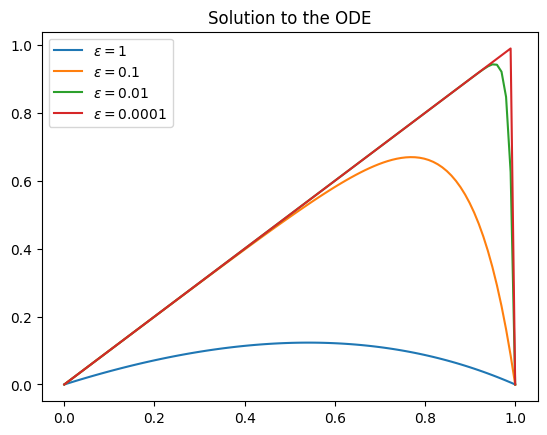

In [106]:
u = lambda x,eps,psi: (1/psi * (1+(np.exp(psi/eps)-1)*x - np.exp(x*psi/eps))/(np.exp(psi*eps)-1))*np.exp(-psi/eps)/np.exp(-psi/eps)
u_stabil = lambda x, eps, psi: 1/psi*(np.exp(-psi/eps)+(1-np.exp(-psi/eps))*x-np.exp((x-1)*psi/eps))/(1-np.exp(-psi/eps))
x = np.linspace(0,1,100)
psi = 1
epsilons = [1,0.1,0.01,0.0001]

for eps in epsilons:
    plt.plot(x,u_stabil(x=x,eps=eps,psi=psi),label=r'$\epsilon = $'+str(eps))

plt.legend()
plt.title('Solution to the ODE')
plt.show()

e)

In [105]:
import numpy as np
from scipy.sparse import csr_matrix
K = lambda h, psi, eps: np.array([[eps/h + psi/2, -eps/h + psi/2], [-eps/h - psi/2, eps/h - psi/2]])

def GlobalAssembly(x,eps,psi,c,d):
    M = len(x)
    nnzmax = 4 * M
    ii = np.ones(nnzmax, dtype=int)
    jj = np.ones(nnzmax, dtype=int)
    ss = np.zeros(nnzmax)
    b = np.zeros(M)
    count = 0
    for i in range(M - 1):
        h = x[i+1] - x[i]
        b[i] += h/2
        b[i+1] += h/2

        Ki = K(h,psi,eps)

        ii[count:count + 4] = [i, i, i + 1, i + 1]
        jj[count:count + 4] = [i, i + 1, i + 1, i]
        ss[count:count + 4] = [
        Ki[0, 0],
        Ki[0, 1],
        Ki[1, 1],
        Ki[1, 0]
        ]
        count += 4
    
    A = csr_matrix((ss[:count], (ii[:count], jj[:count])), shape=(M, M))

    # Boundary conditions
    b[0] = c
    b[1] -= A[0,1]*c

    A[0,0] = 1
    A[0,1] = 0
    A[1,0] = 0
    
    b[M-1] = d
    b[M-2] -= A[M-1,M-2]*d

    A[M-1,M-1] = 1
    A[M-1,M-2] = 0
    A[M-2,M-1] = 0

    return A, b

In [103]:
from scipy import sparse
import numpy as np

def BVP1D(L, x, eps,psi=1,c=0, d=0, plot=True):
    
    if type(x) == int:
        x = np.linspace(0, L, x)

    A,b = GlobalAssembly(x,eps,psi,c,d)

    u = sparse.linalg.spsolve(A, b)
    
    if plot:
        plt.plot(x, u, 'r--',label="FEM solution")
        plt.show()

    return u


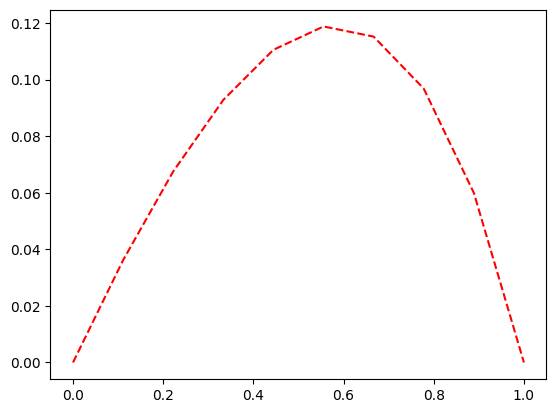

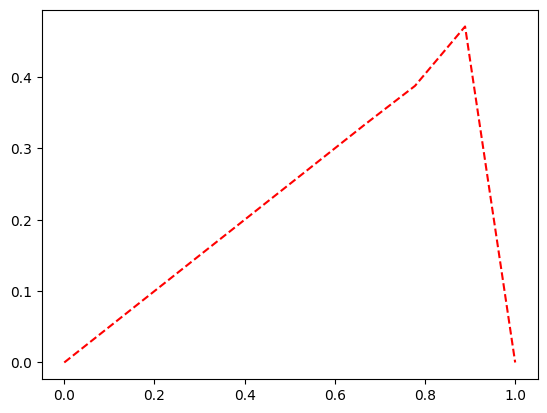

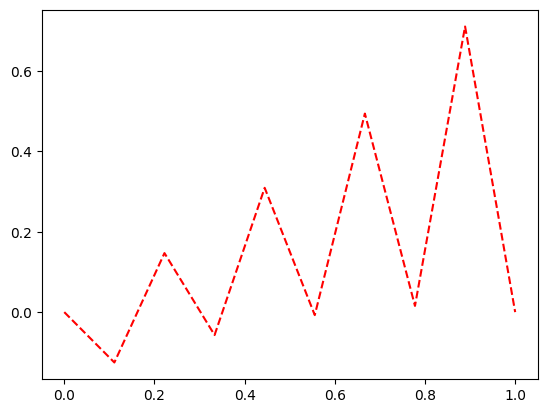

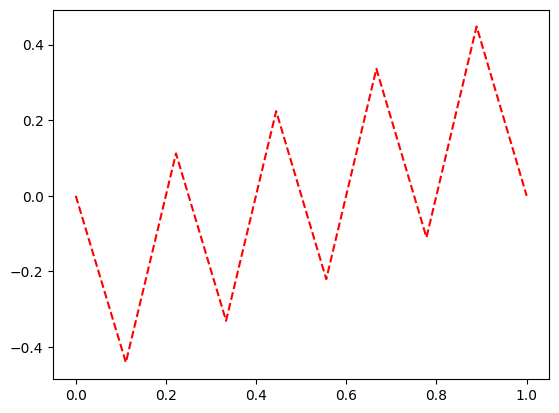

In [107]:
epsilons = [1,0.1,0.01,0.0001]

for eps in epsilons:
    BVP1D(L=1,x=np.linspace(0,1,10),eps=eps,psi=2,plot=True)

As we see for the lower values of epsilon, we get rather poor estimates.

# Exercise 1.6

a)

For convinience we denote the interpolation $\hat{u}_h(x) = \Pi_{(h,i)} u(x_i)$. We have the two points $(x_i,\hat{u}_h(x_i))$ and $(x_{i+1}, \hat{u}_h(x_{i+1}) )$, the line element can then be expressed by the function
\begin{align*}
a &= \frac{\hat{u}_h(x_{i+1}) - \hat{u}_h(x_{i})}{ x_{i+1} - x_i} \\
b &= \hat{u}_h(x_{i}) - a x_i \\
y &= a x + b
\end{align*}
If we now introduce an extra point $(x_{i + \frac{1}{2}}, \hat{u}_{\frac{h}{2}}(x_{i + \frac{1}{2}}))$, then we can define two similar linear functions $y_1$ and $y_2$. We want to compute the error
\begin{align*} 
\Delta \text{err}_i &= \lVert \hat{u}_h(x) - \hat{u}_{\frac{h}{2}}(x) \rVert_{L_2(e_i)} \\
&= \sqrt{ \int_{x_i}^{x_{i+1}} | \hat{u}_h(x) - \hat{u}_{\frac{h}{2}}(x) |^2 dx } \\
&= \sqrt{ \int_{x_i}^{x_{i+\frac{1}{2}}} | \hat{u}_h(x) - \hat{u}_{\frac{h}{2}}(x) |^2 dx + \int_{x_{i+\frac{1}{2}}}^{x_{i+1}} | \hat{u}_h(x) - \hat{u}_{\frac{h}{2}}(x) |^2 dx } \\
&= \sqrt{ \int_{x_i}^{x_{i+\frac{1}{2}}} | y - y_1 |^2 dx + \int_{x_{i+\frac{1}{2}}}^{x_{i+1}} | y - y_2 |^2 dx } 
\end{align*}
We calculate these integrals one by one
\begin{align*}
\int_{x_i}^{x_{i+\frac{1}{2}}} | y - y_1 |^2 dx &= \int_{x_i}^{x_{i+\frac{1}{2}}} | ax+b - (a_1x + b_1) |^2 dx \\
&= \int_{x_i}^{x_{i+\frac{1}{2}}} | (a-a_1) x + (b - b_1) |^2 dx \\
&= \int_{x_i}^{x_{i+\frac{1}{2}}}  (a-a_1)^2 x^2 + (b - b_1)^2 + 2 (a-a_1)(b-b_1) x dx \\
&= \frac{(a-a_1)^2}{3} \left( x_{i+\frac{1}{2}}^3 - x_i^3 \right) + (b - b_1)^2 \left( x_{i+\frac{1}{2}} - x_i \right) + (a-a_1)(b-b_1) \left( x_{i+\frac{1}{2}}^2 - x_i^2 \right)
\end{align*}
From this we see that the second integral most be
\begin{align*}
\int_{x_{i+\frac{1}{2}}}^{x_{i+1}} | y - y_2 |^2 dx 
&= \frac{(a-a_2)^2}{3} \left(  x_{i+1}^3 - x_{i+\frac{1}{2}}^3 \right) + (b - b_2)^2 \left(  x_{i+1} - x_{i+\frac{1}{2}} \right) + (a-a_2)(b-b_2) \left(  x_{i+1}^2 - x_{i+\frac{1}{2}}^2 \right)
\end{align*}

Let $x'$ denote the the new point between $x_{i}$ and $x_{i+1}$. We recall that $\hat{u}_{h} = u$ on $\{x_{i},x_{i+1}\}$ and $\hat{u}_{1/2} = u$ on $\{x_{i}, x',x_{i+1}\}$.

We simplify by computing

\begin{align*}
    a-a_1 & = \frac{\hat{u}_h(x_{i+1}) - \hat{u}_h(x_{i})}{ x_{i+1} - x_i} -  \frac{\hat{u}_{h/2}(x') - \hat{u}_{h/2}(x_{i})}{ x' - x_i}\\
          & = \frac{u(x_{i+1}) - u(x_{i})}{ x_{i+1} - x_i} -  \frac{u(x') - u(x_{i})}{ \frac{1}{2}(x_{i+1} - x_i)}\\
          & = \frac{u(x_{i+1}) - u(x_{i}) - 2u(x') + 2u(x_{i}) }{ x_{i+1} - x_i} =  \frac{u(x_{i+1}) + u(x_{i}) - 2u(x') }{ x_{i+1} - x_i} 
\end{align*}

and

\begin{align*}
    b-b_1 = (\hat{u}_{h}(x_{i}) - ax_1) - (\hat{u}_{h/2}(x_{i}) - a_1x_{i}) = u(x_{i}) - ax_{i} - (y(x_{i}) - a_1x_{i}) = (a_1-a)x_{i}
\end{align*}

Likewise we can conclude

\begin{align*}
    a-a_2 & = \frac{\hat{u}_h(x_{i+1}) - \hat{u}_h(x_{i})}{ x_{i+1} - x_i} -  \frac{\hat{u}_{h/2}(x_{i+1}) - \hat{u}_{h/2}(x')}{x_{i+1}-x'}\\
          & = \frac{u(x_{i+1}) - u(x_{i})}{ x_{i+1} - x_i} -  \frac{u(x_{i+1}) - u(x')}{ \frac{1}{2}(x_{i+1}-x_{i})}\\
          & = \frac{u(x_{i+1}) - u(x_{i}) - 2u(x_{i+1}) + 2u(x') }{ x_{i+1} - x_i} =  \frac{-u(x_{i+1}) - u(x_{i}) + 2u(x') }{ x_{i+1} - x_i} = -(a-a_1)
\end{align*}

and

\begin{align*}
    b-b_2 = \hat{u}_{h}(x_{i+1}) - ax_{i+1} - (\hat{u}_{h/2}(x_{i+1}) - a_2x_{i+1}) = u(x_{i+1}) - ax_{i+1} - (y(x_{i+1}) - a_2x_{i+1}) = (a_2-a)x_{i+1}
\end{align*}


a) in the following code we have implemented the compute_error_decrease function based on the calculations above. 

In [108]:
import numpy as np

def compute_error_decrease(u,VX,EToV):
    
    N = len(EToV[:,0])
    err = np.zeros(N)

    for i, pair in enumerate(EToV):

        xi   = VX[pair[0]]
        xip1 = VX[pair[1]]
        xih  =  xi + (xip1 - xi)/2

        ui   = u(xi)
        uip1 = u(xip1)
        uih  = u(xih)

        a_a1 = ( - ui + 2 * uih - uip1 ) / (xi - xip1)
        a_a2 = - a_a1     
        b_b1 = a_a2 * xi
        b_b2 = a_a1*xip1

        int1 = (a_a1**2/3) * (xih**3 - xi**3) + (b_b1)**2 * (xih - xi) + (a_a1)*(b_b1) * (xih**2 - xi**2)
        int2 = (a_a2**2/3) * (xip1**3 - xih**3) + (b_b2)**2 * (xip1 - xih) + (a_a2)*(b_b2) * (xip1**2 - xih**2)

        err[i] = np.sqrt(int1 + int2)

    return err

[1.77914618e-08 1.29063543e-01 1.33818899e-01 4.47792960e-03
 4.47792960e-03]


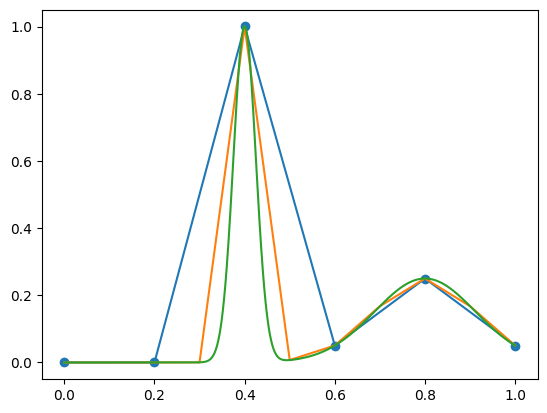

In [79]:
import matplotlib.pyplot as plt

#Example

VX = np.linspace(0,1,6)
EToV = np.array([[0,1],[1,2],[2,3],[3,4],[4,5]])
u = lambda x: np.exp(-800*(x-0.4)**2) + 0.25 * np.exp(-40*(x-0.8)**2)

error = compute_error_decrease(u,VX,EToV)
print(error)
x = np.linspace(0,1,1000)

VXfine = np.linspace(0,1,11)

plt.plot(VX,u(VX),"o-")
plt.plot(VXfine,u(VXfine))
plt.plot(x,u(x))

b) 

In [114]:
def refine_marked(EToVcoarse, xcoarse, idxMarked):
    N = len(EToVcoarse[:,0]) + 1

    # ETofine = EToVcoarse.copy()
    # xcoarse = xcoarse.copy()

    for idx in idxMarked:
        xi   = xcoarse[EToVcoarse[idx][0]]
        xip1 = xcoarse[EToVcoarse[idx][1]]
        xih  =  xi + (xip1 - xi)/2

        xcoarse = np.hstack((xcoarse,[xih]))

        M = EToVcoarse[idx][1]
        EToVcoarse[idx][1] = N 
        EToVcoarse = np.vstack((EToVcoarse,[N,M]))

        N += 1

    return EToVcoarse, xcoarse

c) 

In [115]:
def AMR(u,VX,EToV,tol=10e-4, alpha=1):
    idxMarked = [0]
    while len(idxMarked)>0:
        err = compute_error_decrease(u,VX,EToV)
        idxMarked = np.where(err > tol*alpha)[0]
        EToV, VX = refine_marked(EToV,VX,idxMarked)
    return EToV, VX, err

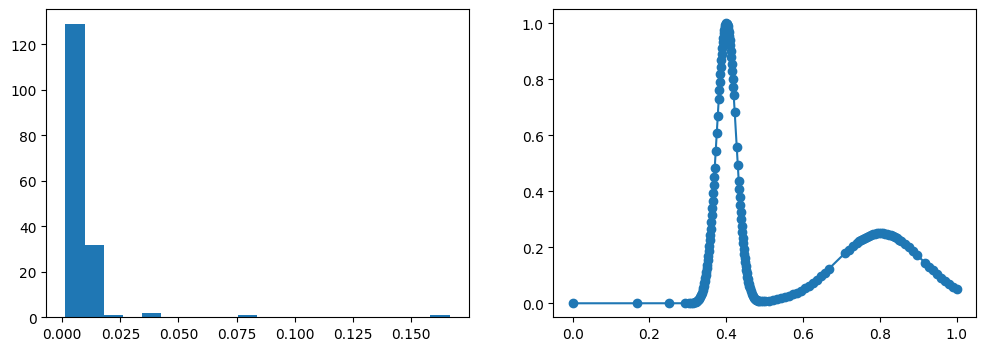

In [116]:
VX = np.linspace(0,1,4)
EToV = np.array([[0,1],[1,2],[2,3]])

EToV, VX, err = AMR(u,VX,EToV,tol=1e-5, alpha=1)

VX = np.sort(VX)

VXdiff = np.diff(VX) 

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(VXdiff, bins=20)
ax[1].plot(VX,u(VX),"o-")

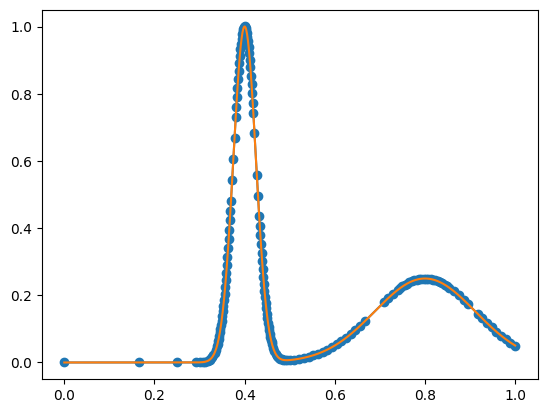

In [171]:
# comparison with exact solution

x = np.linspace(0,1,1000)

plt.plot(VX,u(VX),"o-")
plt.plot(x,u(x))
plt.show()

d)

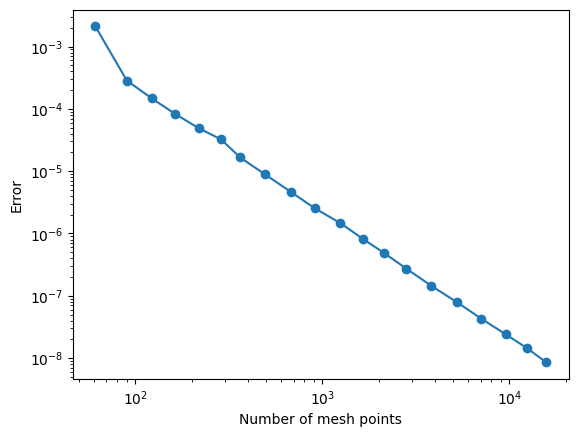

In [124]:
N = 20
tolerance = np.logspace(-10,-4,N)
error = np.zeros(N)
meshpoints = np.zeros(N)
for i, tol in enumerate(tolerance):
    VX = np.linspace(0,1,4)
    EToV = np.array([[0,1],[1,2],[2,3]])

    EToV, VX, err = AMR(u,VX,EToV,tol=tol, alpha=1)

    VX = np.sort(VX)

    x_new = np.linspace(VX.min(), VX.max(), 1000)  # create new x values
    u_interpol = np.interp(x_new, VX, u(VX))  # interpolate u(VX) to the new x values

    error[i] = np.sqrt(np.mean((u(x)-u_interpol)**2))
    meshpoints[i] = len(VX)

plt.loglog(meshpoints,error,'o-')
plt.xlabel('Number of mesh points')
plt.ylabel('Error')
plt.show()